<a href="https://colab.research.google.com/github/Anushka-Punukollu/StrokePrediction/blob/main/StrokePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import metrics

In [ ]:
filename = "StrokeData.csv"
df = pd.read_csv(filename)

df_row_count, df_column_count=df.shape
print('Total number of rows:', df_row_count)
print('Total number of columns:', df_column_count)

Total number of rows: 5110
Total number of columns: 12


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

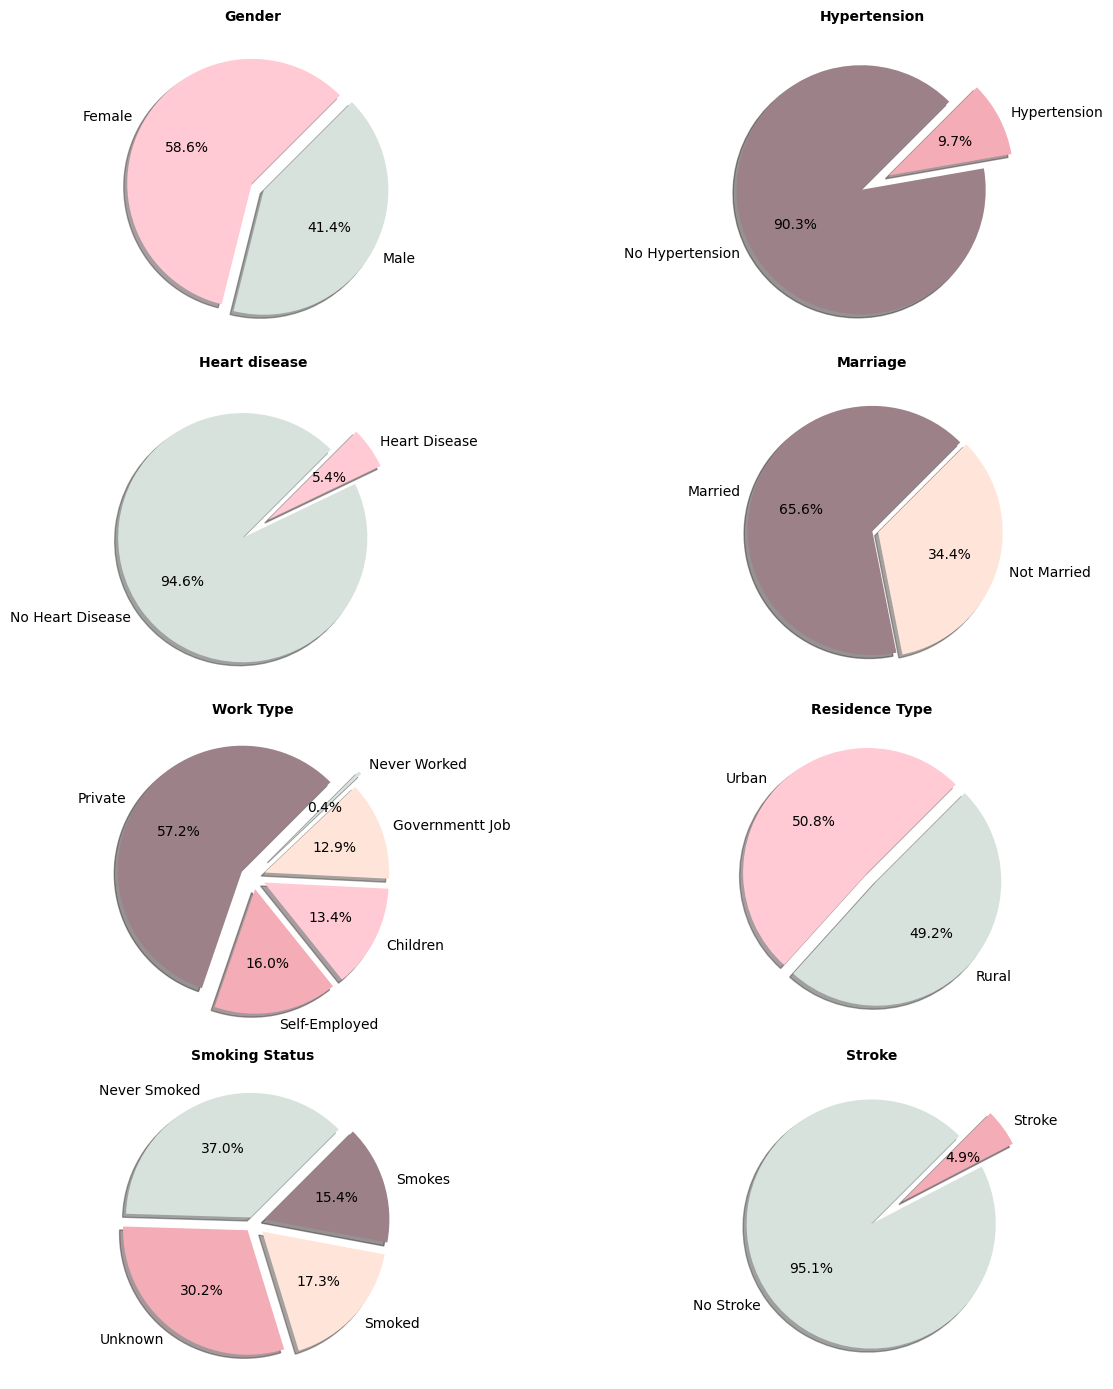

In [ ]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = df['gender'].value_counts().index.tolist()[:2]
values = df['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FFCAD4','#D8E2DC'],shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 10},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = df['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#9D8189','#F4ACB7'],shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 10},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = df['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#D8E2DC','#FFCAD4'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 10},fontweight ='bold')

labels = ["Married", "Not Married"]
values = df['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#9D8189','#FFE5D9'],shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 10},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Governmentt Job", "Never Worked"]
values = df['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#9D8189','#F4ACB7','#FFCAD4','#FFE5D9','#D8E2DC'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 10},fontweight ='bold')

labels = ["Urban", "Rural"]
values = df['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#FFCAD4','#D8E2DC'],shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 10},fontweight ='bold')

labels = ["Never Smoked", "Unknown", "Smoked", "Smokes"]
values = df['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1],colors=['#D8E2DC','#F4ACB7','#FFE5D9','#9D8189'])
ax7.set_title("Smoking Status", fontdict={'fontsize': 10},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = df['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['#D8E2DC','#F4ACB7'])
ax8.set_title("Stroke", fontdict={'fontsize': 10},fontweight ='bold')

plt.tight_layout()
plt.show()

In [ ]:
bmi_outliers=df[df['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [ ]:
# Replace Outlier Vals with BMI Mean
df["bmi"] = df["bmi"].apply(lambda x: df.bmi.mean() if x>50 else x)

In [ ]:
# Replace BMI Null Vals with BMI Mean

df.bmi.replace(to_replace=np.nan,value=df.bmi.mean(), inplace=True)
print (df.shape)

(5110, 12)


In [ ]:
# Check Missing Values 
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.drop(columns='id',inplace=True) 
df.head().iloc[:5]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.451796,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df['gender']=df['gender'].replace('Other','Male')

In [ ]:
df.replace({ 'gender': {'Male':1 ,'Female':0}} ,inplace=True)
df.replace({ 'smoking_status': {'Unknown':0 ,'never smoked':1,'formerly smoked':2,'smokes':3}} ,inplace=True)
df.replace({ 'ever_married': {'No':0 ,'Yes':1}} ,inplace=True)
df.replace({ 'work_type': {'Private':0 ,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4}} ,inplace=True)
df.replace({ 'Residence_type': {'Rural':0 ,'Urban':1}} ,inplace=True)

In [ ]:
df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [ ]:
#Define X and y
X = df.drop(['stroke'], axis=1)
y = df['stroke']
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Check Split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)


X_train: (4088, 10)
y_train: (4088,)
X_test: (1022, 10)
y_test: (1022,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Create Random Forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train + Fit Model
clf.fit(X_train, y_train)

# Response Prediction
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)

# Output Accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Random Forest Classifier Accuracy: 93.9334637964775 %


In [ ]:
# Create Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=10)

# Train + Fit Model
clf = clf.fit(X_train,y_train)

# Response Prediction
y_pred = clf.predict(X_test)
acc_dt = round(clf.score(X_test,y_test) * 100, 2)

# Output Accuracy
print ("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")

Decision Tree Accuracy: 92.17221135029354 %


In [ ]:
# Create kNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train + Fit Model
knn.fit(X_train, y_train)

# Response Prediction
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)

# Output Accuracy
print("kNN Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

kNN Accuracy: 93.44422700587084 %


In [ ]:
#Create a svm Classifier
clf = SVC(C=1, kernel='rbf')

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_svm = round(clf.score(X_test,y_test) * 100, 2)

# evaluate accuracy
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

SVM Accuracy: 93.9334637964775 %


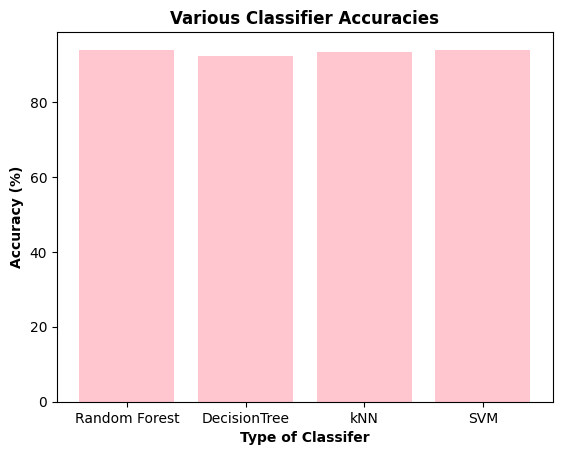

In [ ]:
# Visualize Results
predictors_group = ('Random Forest', 'DecisionTree','kNN','SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_rf, acc_dt,acc_knn, acc_svm]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.9, color='pink')
plt.xticks(x_pos, predictors_group, rotation='horizontal')
plt.xlabel('Type of Classifer', weight='bold')
plt.ylabel('Accuracy (%)', weight='bold')
plt.title('Various Classifier Accuracies', weight='bold')
plt.show()